In [87]:
import pandas as pd
import numpy as np
from collections import defaultdict
from utils import get_names2abbrs_dict
from matplotlib import pyplot as plt

In [88]:
pres_preds = pd.read_csv('2020-pres-preds-cleaned.csv')

In [89]:
battleground = pd.read_csv('label_data/2016_pres_labels_battleground.csv')

In [90]:
all_states = list()
for state in get_names2abbrs_dict().values():
    rows = pres_preds[pres_preds['state_po'] == state]
    is_battleground = list(set(battleground[battleground['state_po'] == state]['battleground']))[0]
    dem_std = np.std(rows['dem_vote_share'].values, ddof=1)
    rep_std = np.std(rows['rep_vote_share'].values, ddof=1)
    all_states.append((state, dem_std, rep_std, is_battleground))

In [91]:
variance = pd.DataFrame(all_states, columns=['state_po', 'dem_std', 'rep_std', 'battleground']).sort_values(by='dem_std').reset_index(drop=True)

In [92]:
colors = list(map(lambda x: 'g' if x else 'b', variance['battleground']))

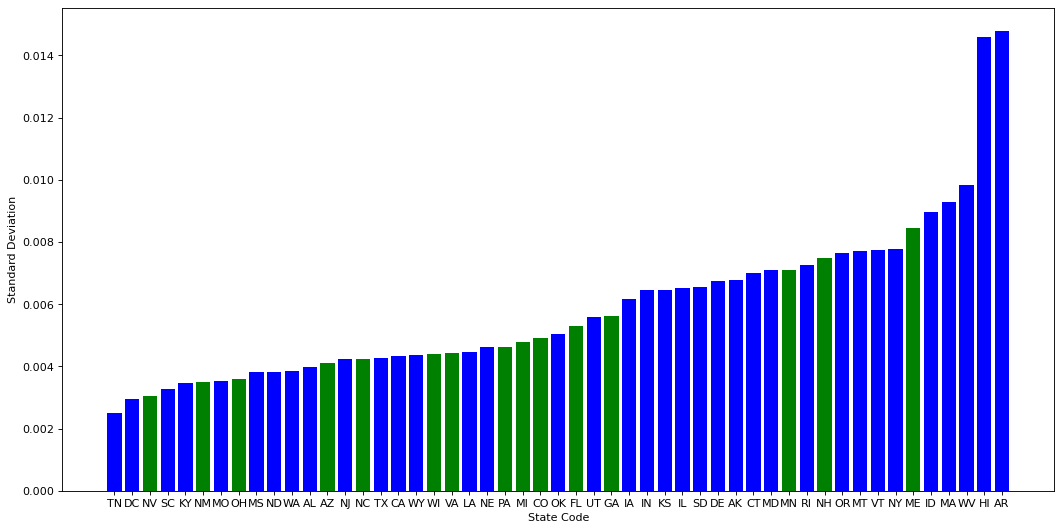

In [98]:
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(data=variance, x='state_po', height='dem_std', color=colors)
plt.xlabel('State Code')
plt.ylabel('Standard Deviation')
plt.savefig('pred_variance.png')
plt.show()

<Figure size 432x288 with 0 Axes>

#### 